# Regresion logistica para predicciones bancarias

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("./Documents/Python Scripts/datasets/bank/bank.csv",sep=";")

In [12]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [13]:
data.shape

(4119, 21)

In [14]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [15]:
# para pasar los datos de una columna a 1 y 0

In [16]:
data["y"] = (data["y"] =="yes").astype(int)

In [17]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [18]:
## para saber datos de una columna 

In [19]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [20]:
# para agrupar y cambiar nombres cuando hay demaciados

In [21]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "High school", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University degree", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional course", data["education"])

data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])
data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])

In [22]:
data["education"].unique()

array(['Basic', 'High school', 'University degree', 'Professional course',
       'Unknown', 'Illiterate'], dtype=object)

In [23]:
data["y"].value_counts() #personas que compran el producto

0    3668
1     451
Name: y, dtype: int64

In [24]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [25]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'frecuencia de compra')

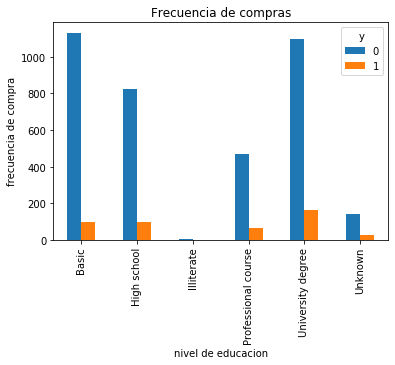

In [26]:
%matplotlib inline
pd.crosstab(data.education , data.y).plot(kind="bar")
plt.title("Frecuencia de compras")
plt.xlabel("nivel de educacion")
plt.ylabel("frecuencia de compra")

Text(0, 0.5, 'proporcion de clientes')

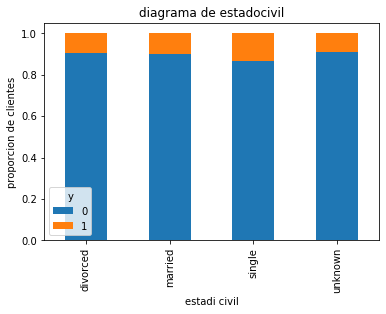

In [27]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar", stacked = True)
plt.title("diagrama de estadocivil")
plt.xlabel("estadi civil")
plt.ylabel("proporcion de clientes")

Text(0, 0.5, 'frecuencia de compra')

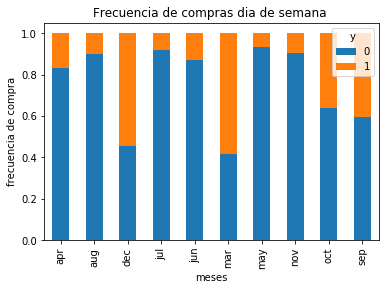

In [28]:
%matplotlib inline
table=pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True)
plt.title("Frecuencia de compras dia de semana ")
plt.xlabel("meses")
plt.ylabel("frecuencia de compra")

Text(0, 0.5, 'frecuencia de compra')

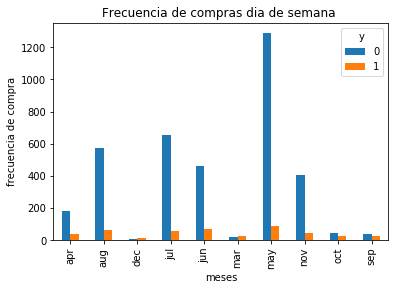

In [29]:
%matplotlib inline
table.plot(kind="bar",stacked=False)
plt.title("Frecuencia de compras dia de semana ")
plt.xlabel("meses")
plt.ylabel("frecuencia de compra")

Text(0, 0.5, 'cliente')

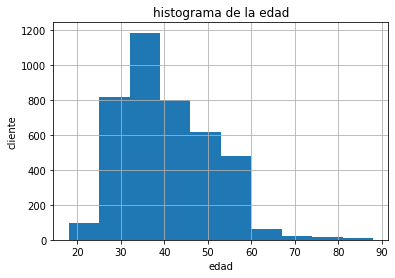

In [30]:
%matplotlib inline
data.age.hist()
plt.title("histograma de la edad")
plt.xlabel("edad")
plt.ylabel("cliente")

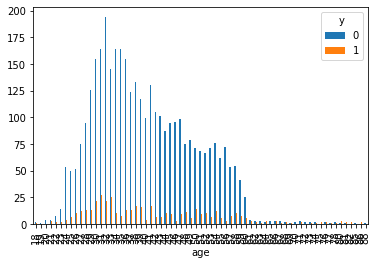

In [31]:
pd.crosstab(data.age, data.y).plot(kind="bar")

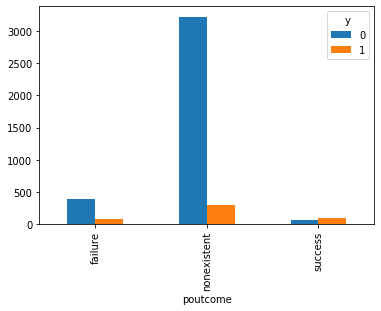

In [32]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

In [33]:
categories = ["job", "marital", "education", "default", "housing", "loan", "contact",
              "month", "day_of_week", "poutcome" ]
print (data)
for category in categories:
    cat_list = "cat"+"_"+category
    cat_dummies = pd.get_dummies(data[category], prefix =category)  
    data_new =data.join(cat_dummies)
    data = data_new

      age          job  marital          education default  housing     loan  \
0      30  blue-collar  married              Basic      no      yes       no   
1      39     services   single        High school      no       no       no   
2      25     services  married        High school      no      yes       no   
3      38     services  married              Basic      no  unknown  unknown   
4      47       admin.  married  University degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married              Basic      no      yes      yes   
4115   39       admin.  married        High school      no      yes       no   
4116   27      student   single        High school      no       no       no   
4117   58       admin.  married        High school      no       no       no   
4118   34   management   single        High school      no      yes       no   

        contact month day_of_week  ... 

In [34]:
data_vars = data.columns.values.tolist()

In [35]:
to_keep =[ v for v in data_vars if v not in categories]


In [36]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High school',
       'education_Illiterate', 'education_Professional course',
       'education_University degree', 'education_Unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [37]:
bank_data_vars =bank_data.columns.values.tolist()
Y = ['y']
X = [ v for v in bank_data_vars if v not in Y]

### Seleccion de rasgos para el modelo

In [38]:
n =12

In [41]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression(solver = 'liblinear')

In [43]:
rfe= RFE(lr,n)
rfe= rfe.fit(bank_data[X], bank_data[Y].values.ravel())

In [44]:
print (rfe.support_)

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True False  True False False False False False False  True False
  True]


In [45]:
print (rfe.ranking_)

[34 42 18 45  1 14 27 25  1 40 22  3  1 36  2 38  1  5 30 32 12 46 19 44
 31 50 26 13 48 21 41  8 35 33 49 20  6 10 15  9 23 16  4 39 24  1  1  1
  1  1 17  1 47 37 28 43 29 11  1  7  1]


In [46]:
z= zip(bank_data_vars,rfe.support_, rfe.ranking_)

In [47]:
list(z)

[('age', False, 34),
 ('duration', False, 42),
 ('campaign', False, 18),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 40),
 ('y', False, 22),
 ('job_admin.', False, 3),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 36),
 ('job_housemaid', False, 2),
 ('job_management', False, 38),
 ('job_retired', True, 1),
 ('job_self-employed', False, 5),
 ('job_services', False, 30),
 ('job_student', False, 32),
 ('job_technician', False, 12),
 ('job_unemployed', False, 46),
 ('job_unknown', False, 19),
 ('marital_divorced', False, 44),
 ('marital_married', False, 31),
 ('marital_single', False, 50),
 ('marital_unknown', False, 26),
 ('education_Basic', False, 13),
 ('education_High school', False, 48),
 ('education_Illiterate', False, 21),
 ('education_Professional course', False, 41),
 ('education_University degree', False, 8),
 ('education_U

In [48]:
cols =["previous", "euribor3m", "job_blue-collar","job_retired", "month_aug", "month_dec", "month_jul", "month_jun", 
      "month_mar", "month_may", "month_nov", "month_oct", "month_sep", "day_of_week_wed"]

In [49]:
X = bank_data[cols]
Y = bank_data["y"]

## Implementacion del modelo en python con statsmodelapi

In [51]:
import statsmodels.api as sm

In [52]:
logit_model = sm.Logit(Y,X)

In [53]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.287429
         Iterations 7


In [54]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.168     
Dependent Variable: y                AIC:              2395.8431 
Date:               2020-05-05 18:56 BIC:              2484.3702 
No. Observations:   4119             Log-Likelihood:   -1183.9   
Df Model:           13               LL-Null:          -1422.9   
Df Residuals:       4105             LLR p-value:      6.8490e-94
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
previous          0.2123   0.0716   2.9644 0.0030  0.0719  0.3527
euribor3m        -0.5980   0.0368 -16.2626 0.0000 -0.6701 -0.5259
job_blue-collar  -0.3864   0.1537  -2.5135 0.0120 -0.6878 -0.0851
job_retired       0.0802   0.2199   0.3647 0.7153 -0.3507  0.5111
month_aug        -0.1304   0.1882  -0.6932 0.4882 -0.4992  0.2384
month_dec         0.5319   0.4432   1.2002 0.2301 -0.3367  1.4006
month_jul         0.2418   0.2125   1.1378 0.2552 -0.1747  0.6582
month_jun         0.2903   0.1874   1.5489 0.1214 -0.0771  0.6577
month_mar         0.9441   0.3100   3.0456 0.0023  0.3365  1.5516
month_may        -1.1672   0.1417  -8.2349 0.0000 -1.4450 -0.8894
month_nov        -0.3192   0.2099  -1.5210 0.1283 -0.7306  0.0921
month_oct        -0.1002   0.2718  -0.3686 0.7125 -0.6329  0.4325
month_sep        -0.1076   0.2743  -0.3924 0.6948 -0.6452  0.4300
day_of_week_wed   0.0378   0.1416   0.2673 0.7893 -0.2396  0.3153
=================================================================

"""

## Implementacion del modelo en python con scikit learn

In [55]:
from sklearn import linear_model

In [56]:
logit_model = linear_model.LogisticRegression(solver = 'liblinear')
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
logit_model.score(X,Y)

0.8956057295460063

In [58]:
1-Y.mean()

0.8905074047098811

In [59]:
pd.DataFrame(list (zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.33219064798009174]
1,euribor3m,[-0.5181838129915602]
2,job_blue-collar,[-0.2734766502576137]
3,job_retired,[0.23444830746040038]
4,month_aug,[0.38060546182733346]
5,month_dec,[0.9830855998722033]
6,month_jul,[0.6662549153905151]
7,month_jun,[0.7886048294309768]
8,month_mar,[1.4322652089641288]
9,month_may,[-0.5725585774381078]


## Validacion del modelo logistico

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,  test_size = 0.3,random_state =0)

In [62]:
lm =linear_model.LogisticRegression(solver = 'liblinear')
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
from IPython.display import display ,Math , Latex

In [64]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p>0.5\end{cases}'))

<IPython.core.display.Math object>

In [65]:
probs = lm.predict_proba(X_test)

In [66]:
probs

array([[0.94816099, 0.05183901],
       [0.88910729, 0.11089271],
       [0.93011834, 0.06988166],
       ...,
       [0.69786645, 0.30213355],
       [0.98091755, 0.01908245],
       [0.52612381, 0.47387619]])

In [67]:
prediction = lm.predict(X_test)

In [68]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
display(Math(r'\varepsilon\in (1,0), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p>\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [70]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.051839,0
1,0.110893,1
2,0.069882,0
3,0.062663,0
4,0.048448,0


In [71]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,888
1,348


In [72]:
348/len(prob_df)*100

28.155339805825243

In [73]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,994
1,242


In [74]:
242/len(prob_df)*100

19.57928802588997

In [75]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,416
1,820


In [76]:
820/len(prob_df)*100

66.34304207119742

In [77]:
from sklearn import metrics

In [78]:
metrics.accuracy_score(Y_test, prediction)

0.9004854368932039

## Validacion cruzada


In [79]:
# para cualquier tipo d  data sets

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
scores = cross_val_score(linear_model.LogisticRegression (solver = 'liblinear'), X,Y, scoring="accuracy", cv=10)

In [82]:
scores

array([0.90291262, 0.89320388, 0.90048544, 0.89320388, 0.89805825,
       0.88834951, 0.88349515, 0.89563107, 0.8907767 , 0.89051095])

In [83]:
scores.mean()

0.8936627453759479

## Matrices de confucion y curvas ROC

In [84]:
x_train, x_test , y_train, y_test =train_test_split(X,Y,test_size =0.3, random_state=0)

In [85]:
lm = linear_model.LogisticRegression(solver = 'liblinear')
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
probs = lm.predict_proba(X_test)

In [87]:
prob = probs [:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>= threshold, 1, 0)
prob_df["actual"] =list(Y_test)## ojo borra los na que tenga
prob_df 

,0,prediction,actual
0,0.051839,0,0
1,0.110893,1,0
2,0.069882,0,0
3,0.062663,0,0
4,0.048448,0,0
...,...,...,...
1231,0.062663,0,0
1232,0.062601,0,0
1233,0.302134,1,0
1234,0.019082,0,0


In [88]:
confunsion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confunsion_matrix

actual,0,1
prediction,,
0,846,42
1,268,80


In [89]:
confunsion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

In [90]:
TN =confunsion_matrix[0][0]
TP =confunsion_matrix[1][1]
FN =confunsion_matrix[0][1]
FP =confunsion_matrix[1][0]

In [91]:
sens =TP/(TP+FN)
sens

0.22988505747126436

In [92]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.04729729729729726

In [93]:
threshold = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25]
sensivities= [1]
especifities_1=[1]

for t in threshold:
    prob_df["prediction"] = np.where(prob_df[0]>= t, 1, 0)
    prob_df["actual"] =list(Y_test)## ojo borra los na que tenga
    prob_df 

    confunsion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN =confunsion_matrix[0][0]
    TP =confunsion_matrix[1][1]
    FP =confunsion_matrix[0][1]
    FN =confunsion_matrix[1][0]

    sens =TP/(TP+FN)
    sensivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)
    
sensivities.append(0)
especifities_1.append(0)

In [94]:
sensivities

[1,
 0.9426229508196722,
 0.8770491803278688,
 0.6885245901639344,
 0.6557377049180327,
 0.6065573770491803,
 0.5655737704918032,
 0.5245901639344263,
 0.4672131147540984,
 0.4262295081967213,
 0]

In [95]:
especifities_1

[1,
 0.7800718132854578,
 0.6400359066427289,
 0.29982046678635543,
 0.2405745062836625,
 0.17324955116696594,
 0.15529622980251345,
 0.1265709156193896,
 0.09874326750448836,
 0.09694793536804314,
 0]

In [96]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'curva ROC')

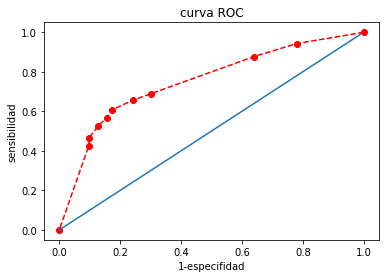

In [97]:
%matplotlib inline
plt.plot(especifities_1, sensivities,marker ="o", linestyle="--", color="r")
x=[i*0.01 for i in range (100)]
y=[i*0.01 for i in range (100)]
plt.plot(x,y)
plt.xlabel("1-especifidad")
plt.ylabel("sensibilidad")
plt.title("curva ROC")

In [138]:
from sklearn import metrics
from plotnine import *


In [139]:
espc_1, sensit, _ = metrics.roc_curve (Y_test,prob)

In [140]:
df = pd.DataFrame({
    "x":espc_1,
    "y":sensit
})

In [141]:
df.head()

,x,y
0,0.0,0.000000
1,0.0,0.008197
2,0.0,0.016393
3,0.0,0.032787
4,0.0,0.040984


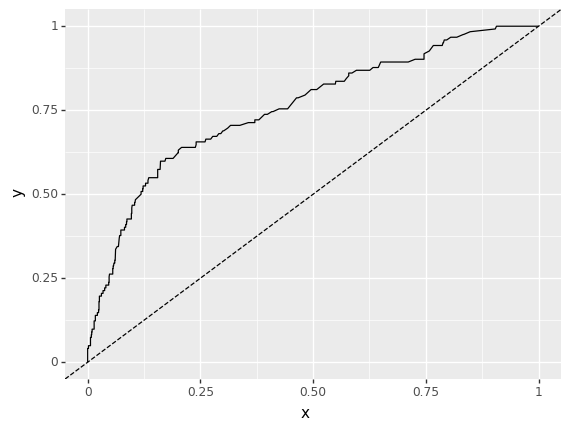

<ggplot: (-9223371942448066316)>

In [145]:
ggplot(df, aes(x="x", y="y"))+ geom_line()+ geom_abline(linetype ="dashed")+ xlim(0,1)+ylim(0,1)

In [151]:
auc =metrics.auc(espc_1,sensit)
auc

0.7580054154280838

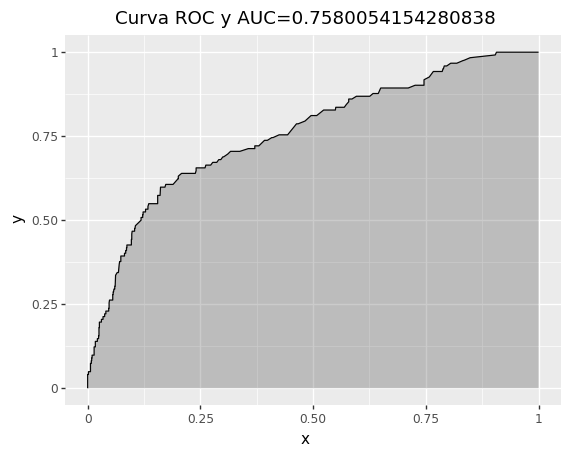

<ggplot: (-9223371942448240176)>

In [152]:
ggplot(df, aes(x="x", y="y")) + geom_line() + geom_area(alpha=0.25, position="identity") + ggtitle("Curva ROC y AUC=%s" % auc)